In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train =pd.read_csv('/content/train.csv',index_col='Id')
df_test =pd.read_csv('/content/test.csv',index_col='Id')

In [3]:
# For numerical data read as categorical data
len_df_train= df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)
for col in ["MSSubClass"]:
    data_train_test[col]= df_train[col].map({20: '1-STORY 1946 & NEWER ALL STYLES' ,
                                  30:'1-STORY 1945 & OLDER' ,
                                  40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                  45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                  50:'1-1/2 STORY FINISHED ALL AGES',
                                  60:'2-STORY 1946 & NEWER',
                                  70:'2-STORY 1945 & OLDER',
                                  75:'2-1/2 STORY ALL AGES',
                                  80:'SPLIT OR MULTI-LEVEL',
                                  85:'SPLIT FOYER',
                                  90:'DUPLEX - ALL STYLES AND AGES',
                                  120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                  150:'1-1/2 STORY PUD - ALL AGES',
                                  160:'2-STORY PUD - 1946 & NEWER',
                                  180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                  190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})
# separating
df_train= data_train_test[:len_df_train]
df_test= data_train_test[len_df_train:]

In [4]:
# For categorical data read as numerical data
len_df_train=df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)

# maybe this information about order can help on performance
for col in ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual",
            "FireplaceQu","GarageQual","GarageCond","PoolQC"]:
    data_train_test[col]= data_train_test[col].map({"Gd": 4 , "TA": 3, "Ex": 5, "Fa":2, "Po":1})

# separating
df_train= data_train_test[:len_df_train]
df_test= data_train_test[len_df_train:]

In [5]:
# For categorical data read as numerical data
len_df_train=df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)

# maybe this information about order can help on performance
for col in ["BsmtFinType1", "BsmtFinType2"]:
    data_train_test[col]= data_train_test[col].map({"GLQ": 6 , "ALQ": 5, "BLQ": 4, "Rec":3, "LwQ":2, "Unf": 1, "NA": 0})

# separating
df_train= data_train_test[:len_df_train]
df_test= data_train_test[len_df_train:]

Drop coloumn with missing value above 30%.

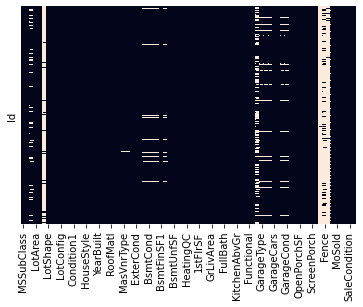

In [6]:
# visualization amount of missing data
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [7]:
#Check the missing data!
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df_train)

PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
                 ...  
CentralAir        0.00
SaleCondition     0.00
Heating           0.00
TotalBsmtSF       0.00
MSSubClass        0.00
Length: 80, dtype: float64


In [8]:
# Delete column with missing value above 30%
df_train.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis=1,inplace=True)
df_test.drop(['PoolQC','Fence','MiscFeature','Alley','FireplaceQu'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df_train)

LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageCond        5.55
GarageQual        5.55
                 ...  
CentralAir        0.00
HeatingQC         0.00
SaleCondition     0.00
TotalBsmtSF       0.00
MSSubClass        0.00
Length: 75, dtype: float64


Handling missing value with mean() for numerical data and make missing value in categorical become zero.

In [10]:
len_df_train= df_train.shape[0]
data_train_test= pd.concat([df_train, df_test], sort=False)

In [ ]:
data_train_test.info()

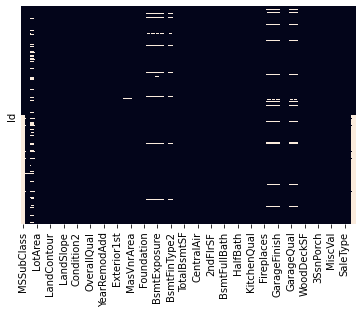

In [12]:
# visualization amount of missing data
sns.heatmap(data_train_test.isnull(),yticklabels=False,cbar=False)

In [14]:
# Select categorical columns 
categorical_cols = [cname for cname in data_train_test.columns if
                    data_train_test[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in data_train_test.columns if 
                data_train_test[cname].dtype in ['int64', 'float64']]

In [15]:
for i in numerical_cols:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mean())

In [16]:
for i in categorical_cols:
    data_train_test[i]=data_train_test[i].fillna(data_train_test[i].mode()[0])

In [17]:
#lets check the missing data again!
missing(data_train_test)

SalePrice       0.0
YearRemodAdd    0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
               ... 
KitchenAbvGr    0.0
KitchenQual     0.0
TotRmsAbvGrd    0.0
Functional      0.0
MSSubClass      0.0
Length: 75, dtype: float64


In [18]:
from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data_train_test[categorical_cols]))

# One-hot encoding removed index; put it back
OH_cols.index = data_train_test.index


# Remove categorical columns (will replace with one-hot encoding)
num_X = data_train_test.drop(categorical_cols, axis=1)

# Add one-hot encoded columns to numerical features
data_train_test = pd.concat([num_X, OH_cols], axis=1)

In [ ]:
#after One-Hot-Encoder has done, lets check how the data now looks like
data_train_test.head()

In [20]:
#split the data again
X_train_full= data_train_test[:len_df_train]
X_test_full= data_train_test[len_df_train:]
y_train = X_train_full['SalePrice']
X_train_full.drop(['SalePrice'],axis=1,inplace=True)
X_test_full.drop(['SalePrice'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
#lets check again for the last
X_train_full.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,...,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,4,3,4.0,3.0,6.0,706.0,1.0,0.0,150.0,856.0,5,856,854,0,1710,1.0,0.0,2,1,3,1,4.0,8,0,2003.0,2.0,548.0,3.0,3.0,0,61,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80.0,9600,6,8,1976,1976,0.0,3,3,4.0,3.0,5.0,978.0,1.0,0.0,284.0,1262.0,5,1262,0,0,1262,0.0,1.0,2,0,3,1,3.0,6,1,1976.0,2.0,460.0,3.0,3.0,298,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,68.0,11250,7,5,2001,2002,162.0,4,3,4.0,3.0,6.0,486.0,1.0,0.0,434.0,920.0,5,920,866,0,1786,1.0,0.0,2,1,3,1,4.0,6,1,2001.0,2.0,608.0,3.0,3.0,0,42,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60.0,9550,7,5,1915,1970,0.0,3,3,3.0,4.0,5.0,216.0,1.0,0.0,540.0,756.0,4,961,756,0,1717,1.0,0.0,1,0,3,1,4.0,7,1,1998.0,3.0,642.0,3.0,3.0,0,35,272,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,84.0,14260,8,5,2000,2000,350.0,4,3,4.0,3.0,6.0,655.0,1.0,0.0,490.0,1145.0,5,1145,1053,0,2198,1.0,0.0,2,1,4,1,4.0,9,1,2000.0,3.0,836.0,3.0,3.0,192,84,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [22]:
#build statistical model using XGBOOTS
import xgboost
from xgboost import XGBRegressor
my_model_1 = XGBRegressor()

In [23]:
#use cross validation score to check the model performance
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_model_1, X_train_full, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

[18:43:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:43:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average MAE score: 15992.634808433218


In [24]:
#lets improve our model!
regressor=xgboost.XGBRegressor()
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [25]:
## Hyper Parameter Optimization


n_estimators = [100,200,300,400,500,600,700,800,850,900,950,1000,1100,1200,1300,1500]
max_depth = [2, 3,4,5,6,7,8,9,10,11,12,13,14,15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [26]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [27]:
random_cv.fit(X_train_full,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  1.5min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  8.3min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 14.7min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 25.6min finished


[19:10:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                

In [28]:
random_cv.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [29]:
my_model_2 = XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=800,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [30]:
# lets check MAE score
scores = -1 * cross_val_score(my_model_2, X_train_full, y_train,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

[19:14:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Average MAE score: 15217.245978702911


In [31]:
#predict usign test set
my_model_2.fit(X_train_full, y_train)
preds_test = my_model_2.predict(X_test_full)

[19:16:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
output = pd.DataFrame({'Id': X_test_full.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)